## Logistic Regression
- Implies that the possible outcomes are not numerical but lather categorical
### Example
### Load Data

In [5]:
# imports
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [12]:
!pwd

/Users/georgemutti/Documents/George/DataScience/all-about-data/all-about-data/notebooks


In [13]:
admmision_data = os.path.join(os.path.pardir,'data','raw','2.01. Admittance.csv')
raw_data = pd.read_csv(admmision_data)
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


### Converting categorical to resemble numerical

In [7]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


### Variables

In [8]:
y = data['Admitted']
x1 = data['SAT']

### Plot the data

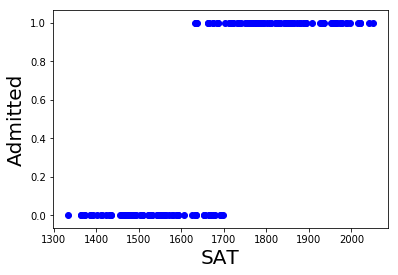

In [9]:
plt.scatter(x1,y,color='#0000ff')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.show();

### Plot a Logistic regression line

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


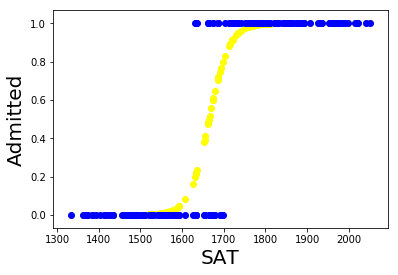

In [16]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
result_log = reg_log.fit()


def f(x,b0,b1):
    return np.array(np.exp(b0+x1*b1)/(1+np.exp(b0+x1*b1)))

f_sorted = np.sort(f(x1,result_log.params[0],result_log.params[1]))
x_sorted = np.sort(x1)

plt.scatter(x_sorted,f_sorted, color="#ffff00")
plt.scatter(x1,y,color='#0000ff')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.show();

### Logistic regression assumptions
- Linearity (Non-linear)
- No endogenity
- No autocorrection
- No autocorrelation
- Normality and Hormoscedasticity

#### Logisting model
- Logistic regression predicts the probability of an event occuring 
- Logistic model : `b0+x1*b1/(1+b0+x1*b1)`
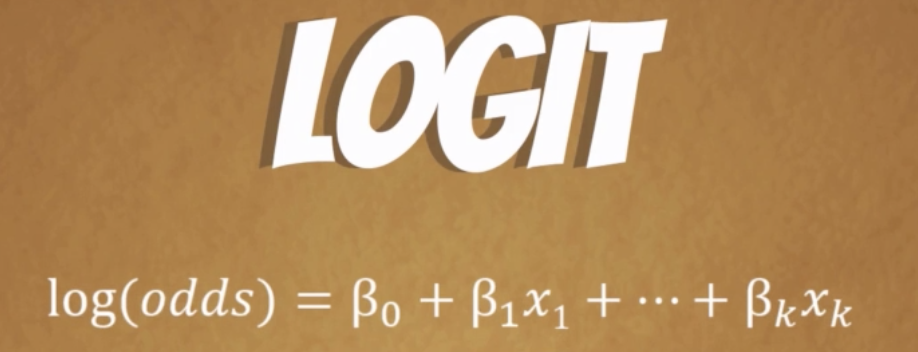
- logit regresssion
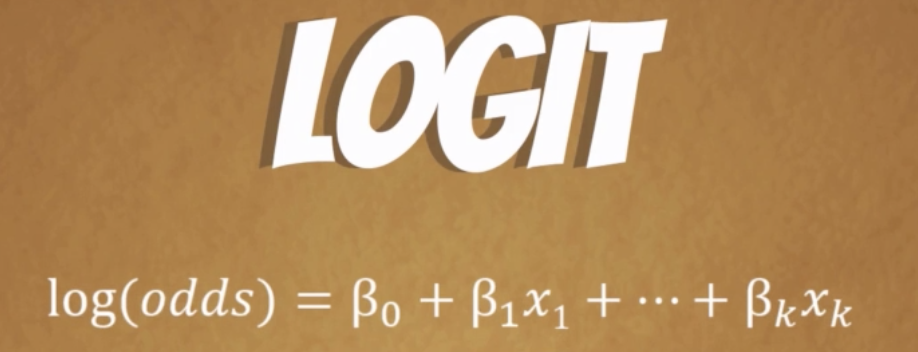
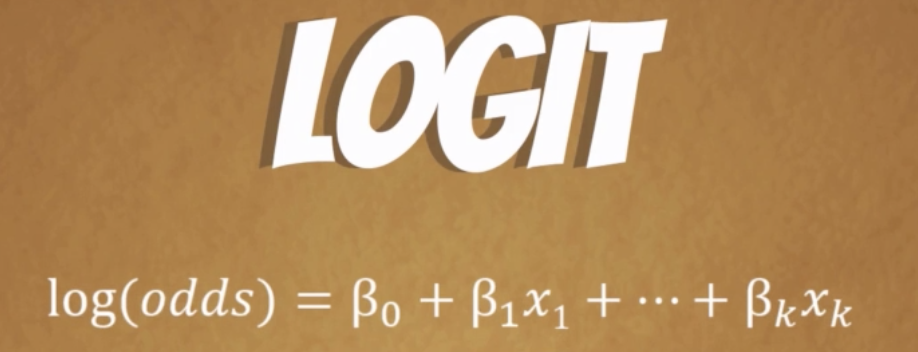
- Linearregression is the basis of logistic regression

### Regression


In [17]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
result_log = reg_log.fit()


Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [20]:
# result_log.summary()
result_log.params

const   -69.912802
SAT       0.042005
dtype: float64

### Understanding logistic regression table
#### MLE (Maximum Likelihood Estimation)
- Function that estimates how likely is it that the model at hand 
  describes the real underlying r/ship of the variables
- The bigger the likelihood function the higer the probability
  that our model is correct
- MLE tries to maximized the likelihood of a function

#### Log Likelihood
- The values of Log Likelihood is almost but not always -ve
- The bigger it is the better

#### LL-Null(Log likelyhood Null)
- Log likelhood of a model which has no independent variables

#### LLR(Log Likelihood Ratio test)
- it is based on Log Likelihood and LL-Null
- it measures if our models is statistically different from LL-Null/useless model

#### Pseudo R Squred
- Good pseudo is always between 0.2 0.4

### Binary predictors

### Calculating the accuracy of the model